In [97]:
import pandas as pd
import requests
import datetime;   
from datetime import datetime as dt
import matplotlib.dates as dates

In [98]:
import warnings
warnings.filterwarnings('ignore')

In [99]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [100]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [101]:
res = requests.get('https://www.google.com/intl/en_ALL/ipv6/statistics/data/adoption.js')

In [102]:
header = res.text.split('\n')[:8]
body   = res.text.split('\n')[8:][:-2]

In [103]:
def get_data_point(line):
    try: year, month, day, v6, relay = line.strip().strip(',').strip('[').strip(']').split(',')
    except Exception as e: print(e, line); return None
    else:
        year   = int(year.strip())
        month  = int(month.strip()) + 1  # google months [0, 11]
        day    = int(day.strip())      
        v6     = float(v6.strip())
        relay  = float(relay.strip())
    return '%s-%s-%s'%(year, month, day), v6, relay

In [104]:
data = []
for idx, item in enumerate(body):
    if idx == 0: continue # skip header
    else: data.append(get_data_point(item))

In [105]:
df = pd.DataFrame(data, columns = ['date', 'v6', 'non-relay'])

In [106]:
df['date'] = df['date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d"))

In [107]:
df.dtypes

date         datetime64[ns]
v6                  float64
non-relay           float64
dtype: object

In [108]:
df = df.sort_values(by = 'date')

In [109]:
df['relay'] = df['v6'] - df['non-relay']

In [110]:
df.head()

,date,v6,non-relay,relay
0,2008-09-04,0.138095,0.044179,0.093916
1,2008-09-05,0.134405,0.042291,0.092114
2,2008-09-06,0.176802,0.048661,0.128141
3,2008-09-07,0.182193,0.051799,0.130394
4,2008-09-08,0.143716,0.044162,0.099554


In [111]:
df.tail()

,date,v6,non-relay,relay
3215,2017-06-24,19.760690,19.720124,0.040566
3216,2017-06-25,19.477789,19.438417,0.039372
3217,2017-06-26,16.652197,16.616463,0.035734
3218,2017-06-27,16.440191,16.409140,0.031051
3219,2017-06-28,16.462092,16.429375,0.032717


In [112]:
df.columns = ['date', 'total', 'v6', 'relay']

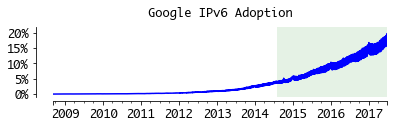

In [133]:
fig = plt.figure()
plt.rcParams['font.size'] = 12
ax = plt.gca()

yticks = np.arange(0,25,5)

df.plot(    'date'
            , ['v6']
            , figsize = (6, 1.3)
            , ax = ax
            , linewidth = 1.5
            , color = 'blue'
      )

ax.grid(False)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('Websites', fontsize=12)
ax.set_ylabel('', fontsize=12)
ax.legend(['ALEXA 1M'], fontsize=12, loc='best')
ax.legend_.remove()
ax.set_ylim([-1, 22])
ax.set_yticks(yticks)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

def to_percent(y, position): return str(int(y)) + '%'
ax.yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.axvspan('2014-08-01', '2017-07-01', facecolor='g', alpha=0.1)

plt.title('Google IPv6 Adoption', fontsize=12, y=1.05)
plt.savefig('googlev6stats.pdf', format='pdf', bbox_inches='tight')